In [1]:
# کتابخانه های مورد نیاز
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# خواندن اطلاعات
df_2020 = pd.read_csv('IT Salary Survey EU  2020.csv')

In [3]:
# پیش نمایش از اطلاعات موجود
print(df_2020.head(5))
df_2020.info()

             Timestamp   Age Gender    City           Position   \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

  Your main technology / programming language  \
0                                  TypeScript   
1                             

In [4]:
# نمایش تمام ستون ها
print(df_2020.columns.tolist())

['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Yearly bonus + stocks in EUR', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Employment status', 'Сontract duration', 'Main language at work', 'Company size', 'Company type', 'Have you lost your job due to the coronavirus outbreak?', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']


In [5]:
# تغییر نام ستون که به اشتباه یک فضای خالی داشت
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [6]:
# ویژگی های که به نظر من میتوانیم آنها را نادیده بگیریم
features_not_used = ['Timestamp',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country']

In [7]:
# ویژگی های طبقه بندی شده
features_cat = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [8]:
# نمونه ای از ستون عددی نا مرتب
df_2020['Number of vacation days'].value_counts()

30                                              488
28                                              233
27                                              102
25                                               91
26                                               71
24                                               67
29                                               24
20                                               13
21                                               10
32                                                8
31                                                8
22                                                8
36                                                5
35                                                5
40                                                4
0                                                 4
23                                                4
45                                                3
33                                                3
unlimited   

In [9]:
# ویژگی های عددی
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR',]

In [10]:
# بررسی میکنیم آیا همه ویژگی ها را گرفته ایم
len(features_cat + features_num + features_not_used) - len(df_2020.columns)

0

In [11]:
# پر کردن مقادیر از دست رفته
# >>> ویژگی های طبقه بندی شده
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# >>> ویژگی های عددی
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

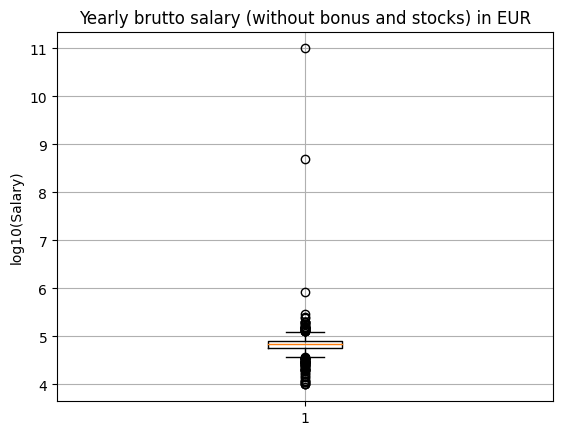

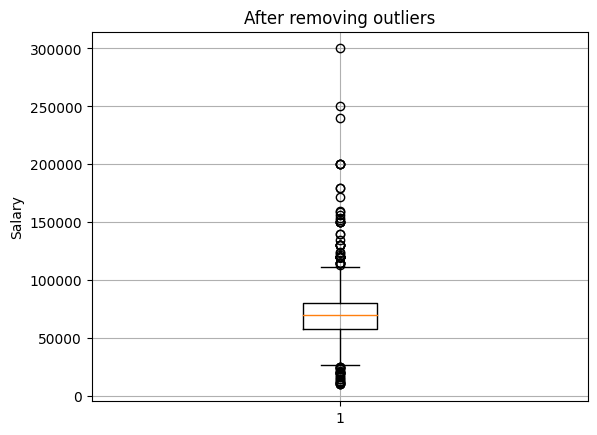

In [12]:
# مقادیر پرت را بررسی میکنیم
plt.boxplot(np.log10(df_2020['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.title('Yearly brutto salary (without bonus and stocks) in EUR')
plt.ylabel('log10(Salary)')
plt.grid()
plt.show()

# مقادیر بسیار بالا را حذف میکنیم
cut_point = 500000
df_2020 = df_2020[df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] <= cut_point]
plt.boxplot(df_2020['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title('After removing outliers')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [13]:
# تمیز کردن رشته (فضاهای اضافی را حذف کرده و به حروف بزرگ تبدیل میکنیم)
def clean_string(x):
    return x.strip().upper()

features_for_string_cleaning = ['City', 'Position', 'Employment status',
                                'Your main technology / programming language',
                                'Other technologies/programming languages you use often',
                                'Seniority level',
                                'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                                'Number of vacation days']

for f in features_for_string_cleaning:
    df_2020[f] = df_2020[f].apply(clean_string)

In [14]:
# کاهش تعداد سطوح"Position"
current_feature = 'Position'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Position
SOFTWARE ENGINEER            387
BACKEND DEVELOPER            174
DATA SCIENTIST               110
FRONTEND DEVELOPER            88
QA ENGINEER                   71
                            ... 
RECRUITER                      1
DBA                            1
DB DEVELOPER/DATA ANALYST      1
SENIOR PROGRAM MANAGER         1
IT OPERATIONS MANAGER          1
Name: Position, Length: 134, dtype: int64

REDUCED TO:
SOFTWARE ENGINEER      387
BACKEND DEVELOPER      174
_OTHER_                115
DATA SCIENTIST         110
FRONTEND DEVELOPER      88
QA ENGINEER             71
DEVOPS                  57
MOBILE DEVELOPER        53
ML ENGINEER             41
PRODUCT MANAGER         39
DATA ENGINEER           26
DESIGNER (UI/UX)        16
ENGINEERING MANAGER     11
DATA ANALYST            11
PROJECT MANAGER          6
_MISSING_                5
CTO                      5
TEAM LEAD                4
SOFTWARE ARCHITECT       4
FULLSTACK DEVELOPER      4
CONSULTANT             

In [15]:
# کاهش تعداد سطوح: "Seniority level"
current_feature = 'Seniority level'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Seniority level
SENIOR                                      564
MIDDLE                                      365
LEAD                                        166
JUNIOR                                       79
HEAD                                         44
_MISSING_                                    11
PRINCIPAL                                     3
NO LEVEL                                      2
STUDENT                                       2
INTERN                                        2
ENTRY LEVEL                                   1
WORKING STUDENT                               1
C-LEVEL                                       1
NO IDEA, THERE ARE NO RANGES IN THE FIRM      1
DIRECTOR                                      1
C-LEVEL EXECUTIVE MANAGER                     1
KEY                                           1
CTO                                           1
WORK CENTER MANAGER                           1
MANAGER                                       1
VP            

In [16]:
# کاهش تعداد سطوح: "Main language at work"
current_feature = 'Main language at work'

df_2020[current_feature].loc[df_2020[current_feature]=='Русский'] = 'Russian'

print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Main language at work
English               1018
German                 186
_MISSING_               15
Russian                 14
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: Main language at work, dtype: int64

REDUCED TO:
English      1018
German        186
_MISSING_      15
Russian        14
_OTHER_        11
Italian         3
Spanish         3
Name: Main language at work, dtype: int64


c:\Users\arman\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
# کاهش تعدا سطوح: "Employment status"
current_feature = 'Employment status'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Employment status
FULL-TIME EMPLOYEE                                                                 1188
SELF-EMPLOYED (FREELANCER)                                                           28
_MISSING_                                                                            16
PART-TIME EMPLOYEE                                                                    8
FOUNDER                                                                               3
WORKING STUDENT                                                                       2
COMPANY DIRECTOR                                                                      1
FULL-TIME POSITION, PART-TIME POSITION, & SELF-EMPLOYED (FREELANCING, TUTORING)       1
INTERN                                                                                1
FULL-TIME, BUT 32 HOURS PER WEEK (IT WAS MY REQUEST, I'M A STUDENT)                   1
WERKSTUDENT                                                                           1
Name

In [18]:
# کاهش تعداد سطوح: "Company type"
current_feature = 'Company type'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Company type
Product                759
Startup                251
Consulting / Agency    142
_MISSING_               24
Bank                     5
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company type, Length: 64, dtype: int64

REDUCED TO:
Product                759
Startup                251
Consulting / Agency    142
_OTHER_                 63
_MISSING_               24
Bank                     5
Media                    3
E-commerce               3
Name: Company type, dtype: int64


In [19]:
# کاهش تعداد سطوح: "Have you received additional monetary support..."
current_feature = 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR
_MISSING_                                                  790
0                                                          160
500                                                         47
NO                                                          40
1000                                                        23
600                                                         20
200                                                         19
1500                                                        19
300                                                         18
700                                                         14
400                                                         12
800                                                          7
250                                                          7
100                                                

In [20]:
# کاهش تعداد سطوح: "Have you lost your job due to the coronavirus outbreak?"
current_feature = 'Have you lost your job due to the coronavirus outbreak?'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Have you lost your job due to the coronavirus outbreak?
No                                                                                        1161
Yes                                                                                         62
_MISSING_                                                                                   19
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Lost the job but for different reason                                                        1
Leads and project inquiries have slowed down                                                 1
Laid off for a bit                                                             

In [21]:
current_feature = 'City'
print(df_2020[current_feature].value_counts().index.tolist())

['BERLIN', 'MUNICH', 'FRANKFURT', 'HAMBURG', 'STUTTGART', 'COLOGNE', 'DÜSSELDORF', 'AMSTERDAM', 'KARLSRUHE', 'PRAGUE', 'MOSCOW', 'STOCKHOLM', 'LONDON', 'ZURICH', 'HEIDELBERG', 'NÜRNBERG', 'HELSINKI', 'MANNHEIM', 'BOEBLINGEN', 'WARSAW', 'NUREMBERG', 'ROME', 'TALLINN', 'DUSSELDORF', 'HANNOVER', 'WOLFSBURG', 'INGOLSTADT', 'BONN', 'DARMSTADT', 'SIEGEN', 'LEIPZIG', 'ROSENHEIM', 'LISBON', 'KYIV', 'MADRID', 'PARIS', 'SAINT-PETERSBURG', 'DUBLIN', 'HILDESHEIM', 'BARCELONA', 'EINDHOVEN', 'MILAN', 'REGENSBURG', 'BRUSSELS', 'AACHEN', 'VIENNA', 'WARSAW, POLAND', 'CRACOW', 'BRUNSWICK', 'CITY IN RUSSIA', 'DORTMUND', 'HEILBRONN', 'JENA', 'NJ, USA', 'SOFIA', 'LUTTICH', 'FR', 'DUESSELDORF', 'DUSSELDURF', 'CAMBRIDGE', 'PREFER NOT TO SAY', 'INNSBRUCK', 'COPENHAGEN', 'ZÜRICH', 'MURNAU AM STAFFELSEE', 'SEVILLA', 'ISTANBUL', 'KRAKOW', 'BASEL', 'BIELEFELD', 'MILANO', 'FRANCE', 'SALZBURG', 'WALLDORF', 'TUTTLINGEN', 'KIEV', 'WÜRZBURG', 'RIGA, LATVIA', 'SAMARA', 'KÖLN', 'KOBLENZ', 'ANSBACH', 'CRACOVIA', 'MOLDOVA

In [22]:
# اصلاح
df_2020[current_feature].loc[df_2020[current_feature]=='BÖLINGEN'] = 'BOEBLINGEN'
df_2020[current_feature].loc[df_2020[current_feature]=='DUSSELDORF'] = 'DUESSELDORF'
df_2020[current_feature].loc[df_2020[current_feature]=='DÜSSELDORF'] = 'DUESSELDORF'
df_2020[current_feature].loc[df_2020[current_feature]=='DUSSELDURF'] = 'DUESSELDORF'
df_2020[current_feature].loc[df_2020[current_feature]=='NÜRNBERG'] = 'NUREMBERG'
df_2020[current_feature].loc[df_2020[current_feature]=='WARSAW, POLAND'] = 'WARSAW'
df_2020[current_feature].loc[df_2020[current_feature]=='ZÜRICH'] = 'ZURICH'

In [23]:
current_feature = 'Number of vacation days'
print(df_2020[current_feature].value_counts().index.tolist())


['30', '28', '27', '25', '26', '24', '_MISSING_', '29', '20', '21', '32', 'UNLIMITED', '22', '31', '36', '40', '23', '35', '0', '14', '33', '45', '15', '12', '37.5', '1', '38', '5', '37', '23+', '39', '34', '24 LABOUR DAYS', '16', '50', '~25', '3', '30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)', '(NO IDEA)', '60', '365', '10']


In [24]:
# اصلاح
df_2020[current_feature].loc[df_2020[current_feature]=='30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)'] = 'U'
df_2020[current_feature].loc[df_2020[current_feature]=='23+'] = '23'
df_2020[current_feature].loc[df_2020[current_feature]=='(NO IDEA)'] = 'M'
df_2020[current_feature].loc[df_2020[current_feature]=='24 LABOUR DAYS'] = '24'
df_2020[current_feature].loc[df_2020[current_feature]=='~25'] = '25'
df_2020[current_feature].loc[df_2020[current_feature]=='365'] = 'U'
df_2020[current_feature].loc[df_2020[current_feature]=='_MISSING_'] = 'M'
df_2020[current_feature].loc[df_2020[current_feature]=='UNLIMITED'] = 'U'

In [25]:
current_feature = 'Total years of experience'
print(df_2020[current_feature].value_counts().index.tolist())

['10', '5', '6', '8', '7', '4', '12', '3', '15', '9', '2', '11', '13', '14', '1', '20', '16', '18', '_MISSING_', '17', '25', '19', '0', '22', '30', '2.5', '21', '1.5', '1,5', '23', '0.8', '27', '3.5', '4.5', '6 (not as a data scientist, but as a lab scientist)', '31', '15, thereof 8 as CTO', '2,5', '383', '1 (as QA Engineer) / 11 in total', '5.5', '24', '29', '28', '7.5', '6.5', '26', '40', 'less than year']


In [26]:
# اصلاح
df_2020[current_feature].loc[df_2020[current_feature]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
df_2020[current_feature].loc[df_2020[current_feature]=='less than year'] = '1'
df_2020[current_feature].loc[df_2020[current_feature]=='15, thereof 8 as CTO'] = '15'
df_2020[current_feature].loc[df_2020[current_feature]=='1 (as QA Engineer) / 11 in total'] = '11'
df_2020[current_feature].loc[df_2020[current_feature]=='383'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='1,5'] = '1.5'
df_2020[current_feature].loc[df_2020[current_feature]=='2,5'] = '2.5'

In [27]:
current_feature = 'Years of experience in Germany'
print(df_2020[current_feature].value_counts().index.tolist())

['2', '1', '3', '5', '4', '0', '6', '7', '_MISSING_', '10', '1.5', '9', '8', '0.5', '12', '2.5', '3.5', '15', '20', '11', '0,5', '1,5', '14', '13', '30', '2,5', '19', '0.25', '18', '3,5', '3 months', '⁰', '<1', '3 (in Poland)', '0,3', '-', '2.6', '0.1', '4.5', '6 (not as a data scientist, but as a lab scientist)', '0.2', '4 (in Switzerland), 0 (in Germany)', '26', '4 month', '17', '16', '< 1', '25', '0.9', '0.4', '1,7', '0.8', '4,5', 'less than year']


In [28]:
# اصلاح
df_2020[current_feature].loc[df_2020[current_feature]=='0,3'] = '0.3'
df_2020[current_feature].loc[df_2020[current_feature]=='0,5'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='1,5'] = '1.5'
df_2020[current_feature].loc[df_2020[current_feature]=='1,7'] = '1.7'
df_2020[current_feature].loc[df_2020[current_feature]=='2,5'] = '2.5'
df_2020[current_feature].loc[df_2020[current_feature]=='3,5'] = '3.5'
df_2020[current_feature].loc[df_2020[current_feature]=='4,5'] = '4.5'
df_2020[current_feature].loc[df_2020[current_feature]=='<1'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='< 1'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='3 months'] = '0.25'
df_2020[current_feature].loc[df_2020[current_feature]=='4 month'] = '0.33'
df_2020[current_feature].loc[df_2020[current_feature]=='4 (in Switzerland), 0 (in Germany)'] = '0'
df_2020[current_feature].loc[df_2020[current_feature]=='less than year'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='⁰'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
df_2020[current_feature].loc[df_2020[current_feature]=='3 (in Poland)'] = '0'

In [29]:
current_feature = 'Yearly bonus + stocks in EUR'
print(df_2020[current_feature].value_counts().index.tolist())

[-1, '0', '5000', '10000', '2000', '6000', '1000', '3000', '20000', '4000', '15000', '7000', '8000', '12000', '70000', '75000', '101', '30000', '40000', '1500', '100000', '60000', '50000', '80000', '25000', '65000', '200000', '55000', '45000', '500', '7500', '120000', '90000', '18000', '11000', '9000', '77000', '35000', '17000', '85000', '150000', '62000', '95000', '4500', '73000', '2500', '6500', '72000', '13000', '56000', '15900', '800', '99000', '16000', '78000', '14000', '4400', '105000', '3375', '43000', '106000', '71000', '87250', '21000', '37968', 'depends', '66500', '6710', '1100', '23000', '84000', '16320', '3600', '97000', '15000+-', 'Not sure', 'Na', '700', '1200', '92000', '45500', '25', '63000', '31500', '28000', '3800', '7200', '80400', '125000', '-', '110000', '12500', '102600', '107000', '2800', '36000', '82500', '53500', '66447', '9450', '82000', '170000', '58000', '54000', '1250', '3250', '60847.32', '7100', '11900', '89000', '140000', '122.13', '400', '46000', '81200

In [30]:
# اصلاح
df_2020[current_feature].loc[df_2020[current_feature]=='bvg only'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='15000+-'] = 15000
df_2020[current_feature].loc[df_2020[current_feature]=='Not sure'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='Na'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='depends'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='1150000'] = -1 # تا حدودی بالا به نظر می رسد

# تبدیل به عددی
df_2020[current_feature] = df_2020[current_feature].astype(float)

# به خاطر سادگی missing و unkowns را با عدد 0 جایگزین میکنیم
df_2020[current_feature].loc[df_2020[current_feature]==-1] = 0

In [31]:
df_2020['Total Income (Salary+Bonus)'] = df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] + df_2020['Yearly bonus + stocks in EUR']

In [32]:
# به روز رسانی لیست ویژگی های عددی ستون بالا
features_num.append('Total Income (Salary+Bonus)')

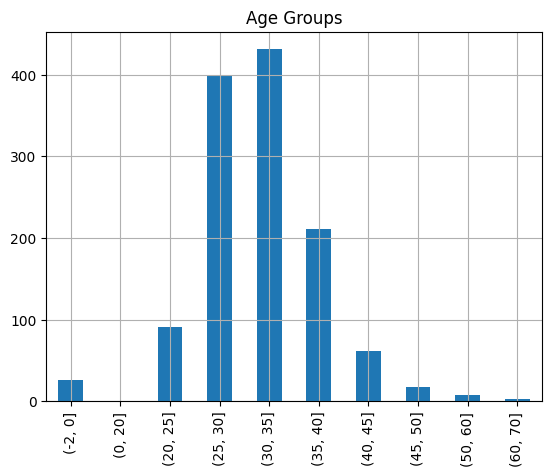

In [33]:
df_2020['AgeGroup'] = pd.cut(df_2020.Age, bins=[-2,0,20,25,30,35,40,45,50,60,70])
df_2020.AgeGroup.value_counts().sort_index().plot(kind='bar')
plt.title('Age Groups')
plt.grid()
plt.show()

#### توجه داشته باشید که (-2,0] مقادیر از دست رفته را نشان می دهد

### خروجی دیتا جدید با دادهای پاک شده

In [34]:
# ذخیره داده های آماده شده
df_2020.to_csv('df_2020_cleaned.csv')

In [35]:
# تغییر سبک نمایش نمودار
plt.style.use('dark_background')

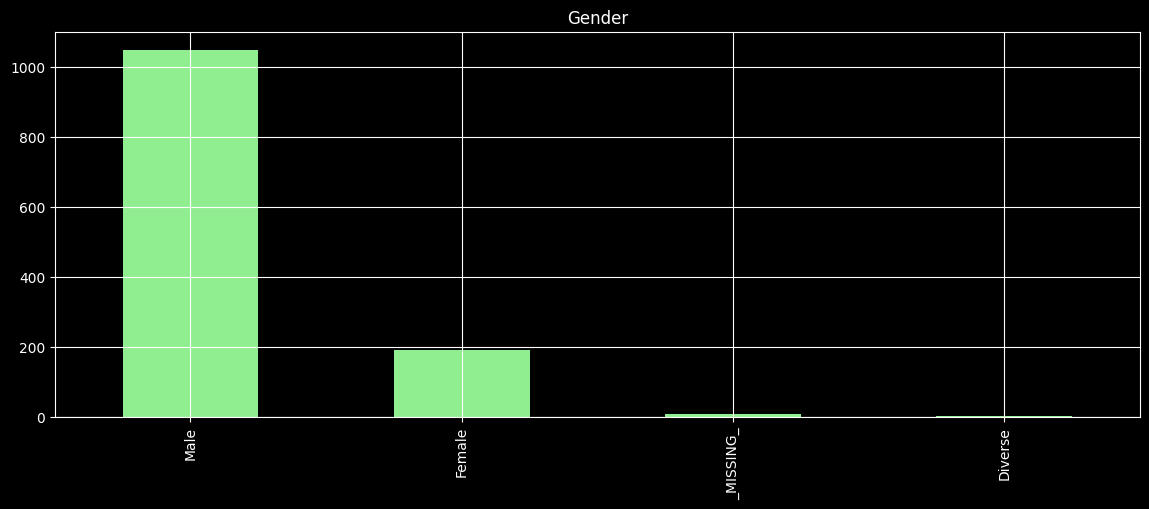

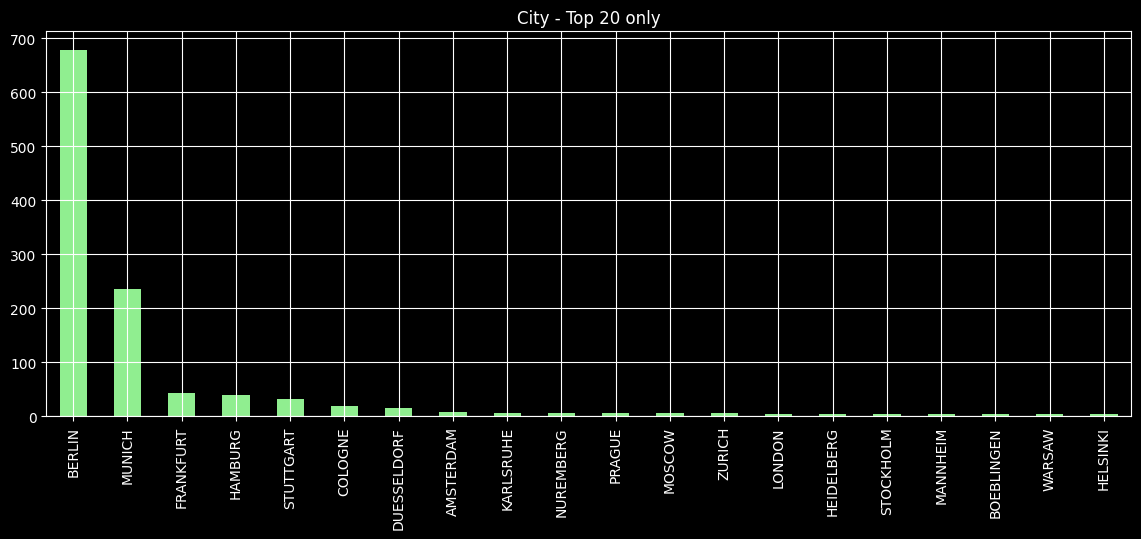

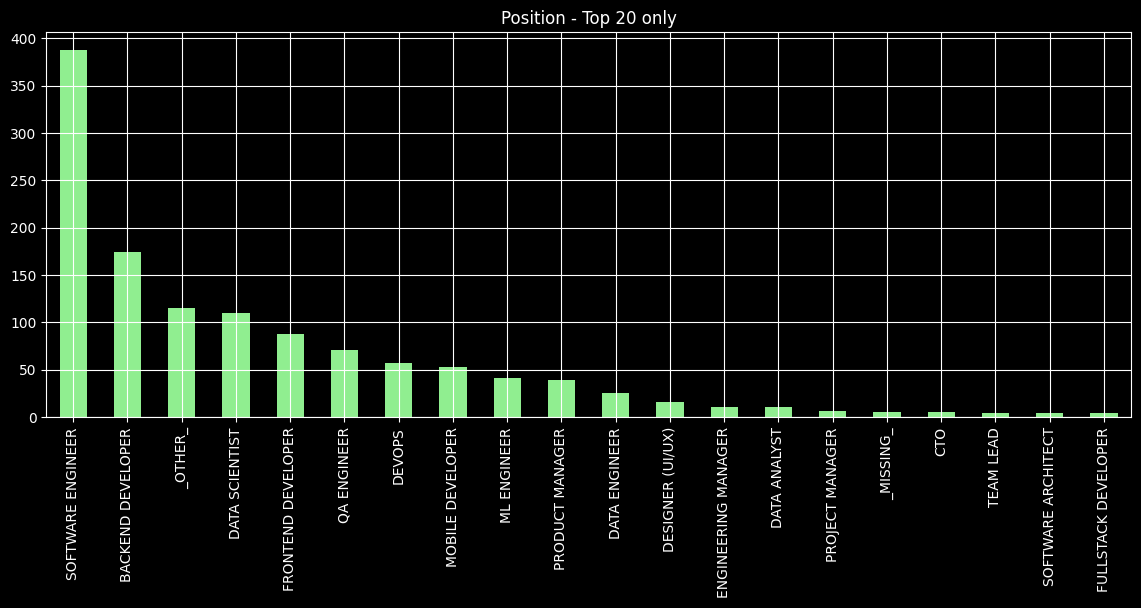

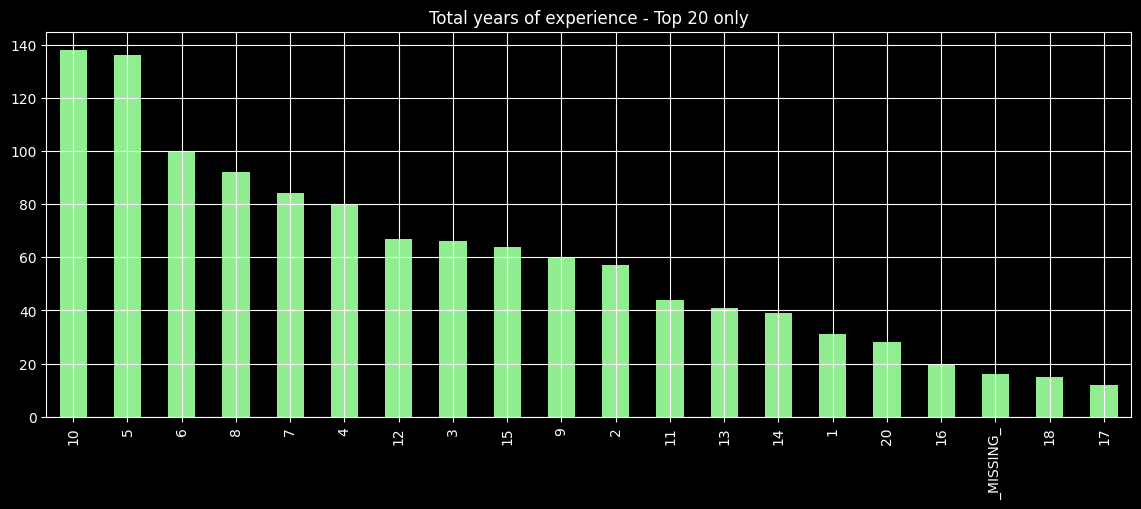

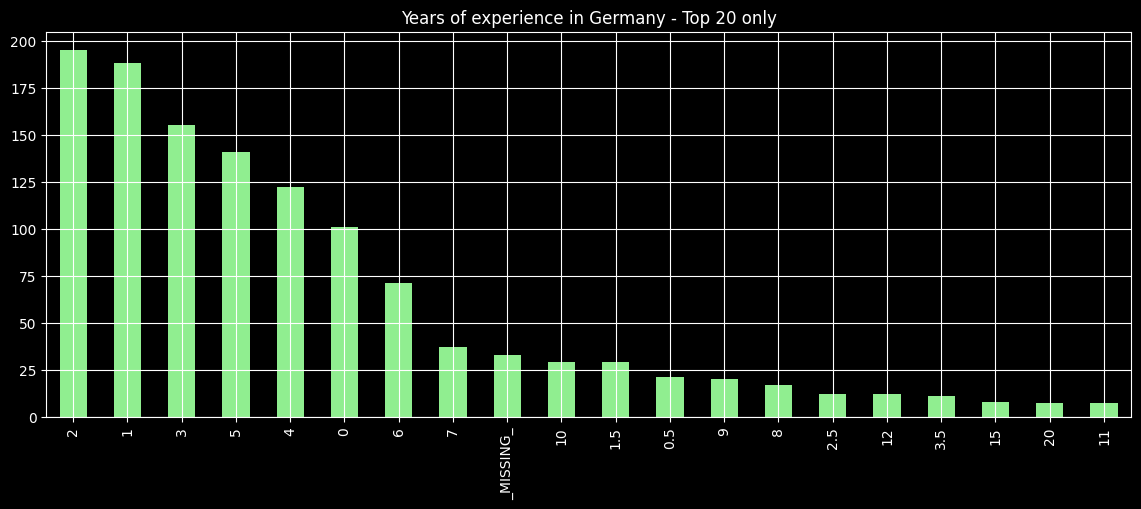

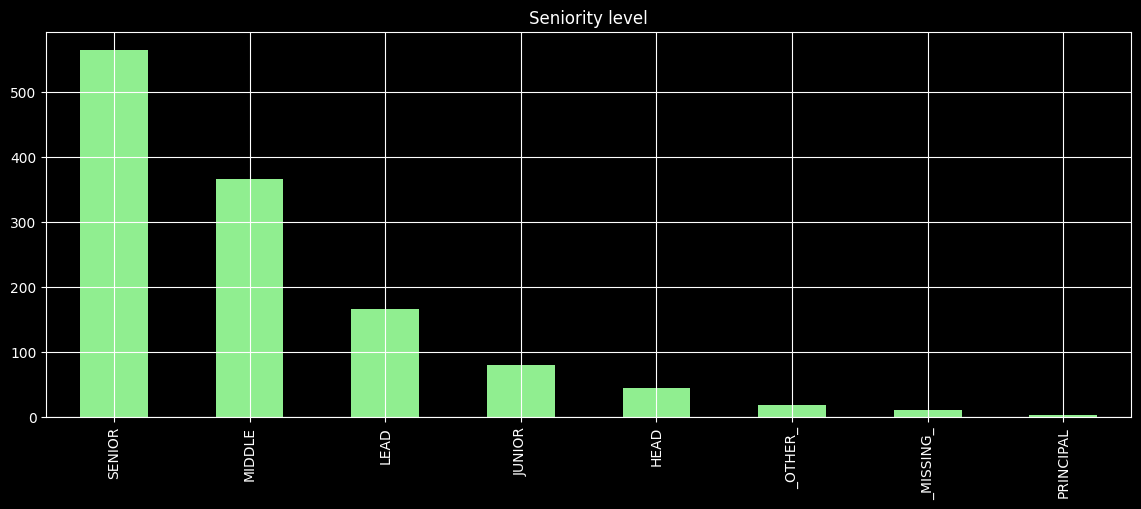

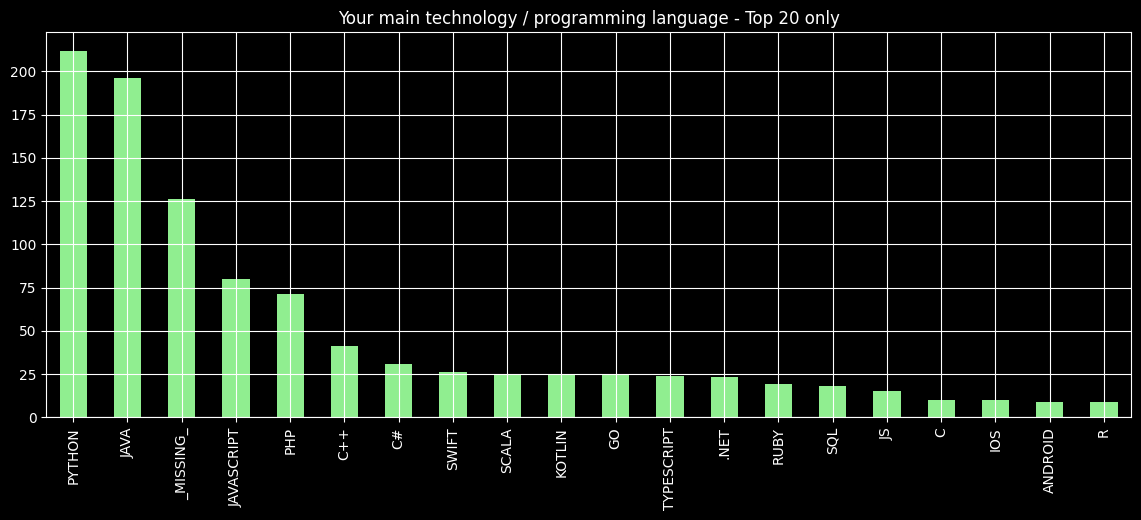

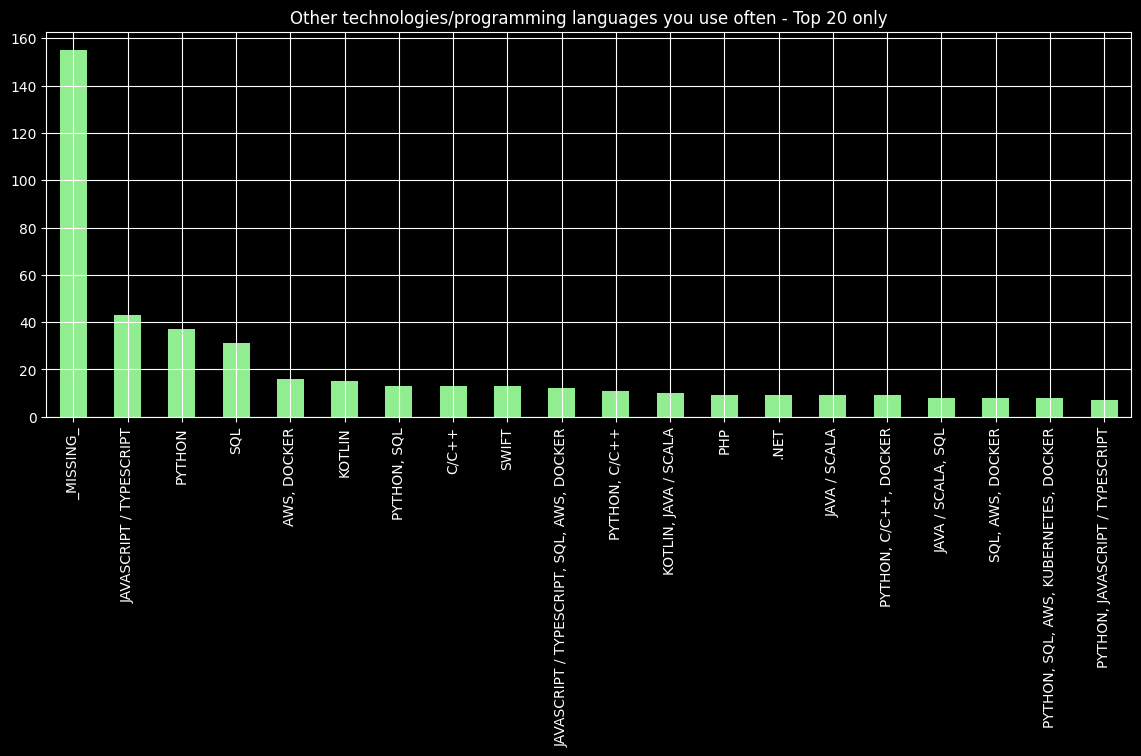

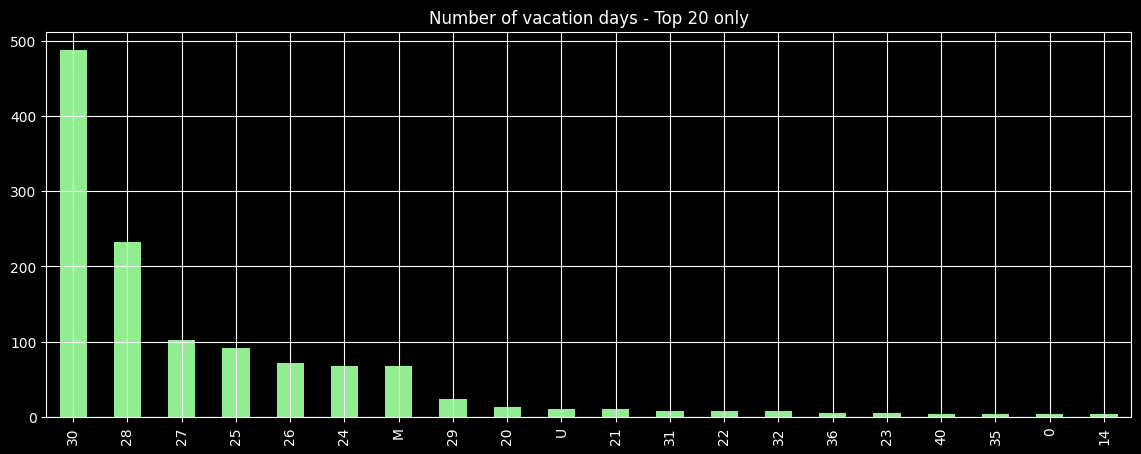

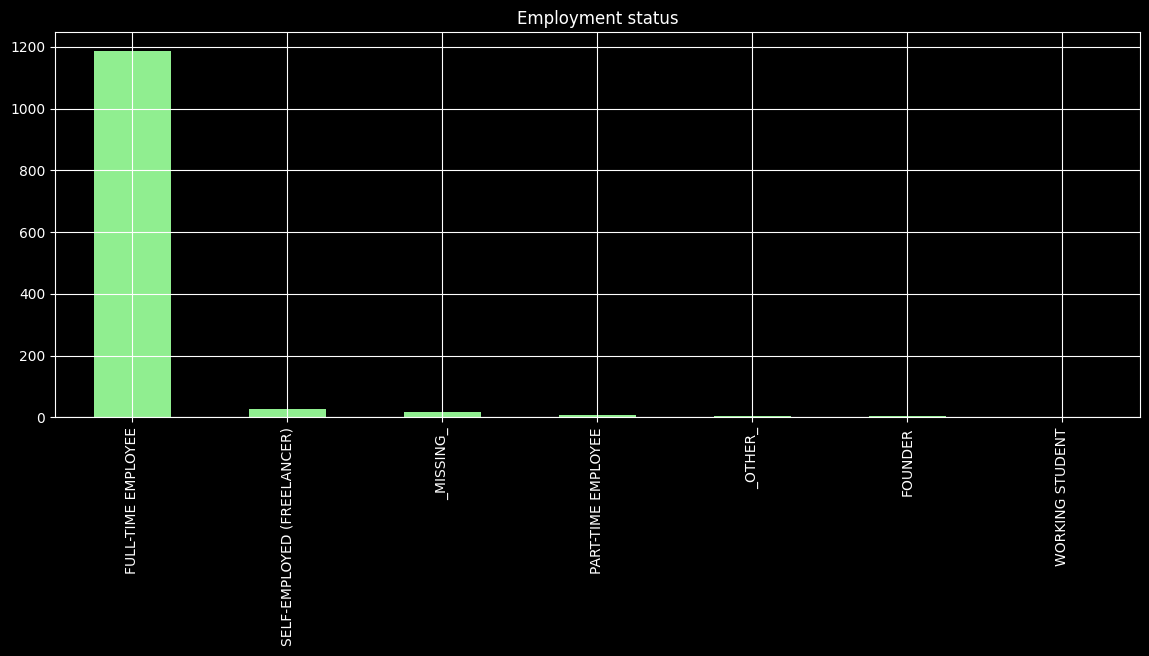

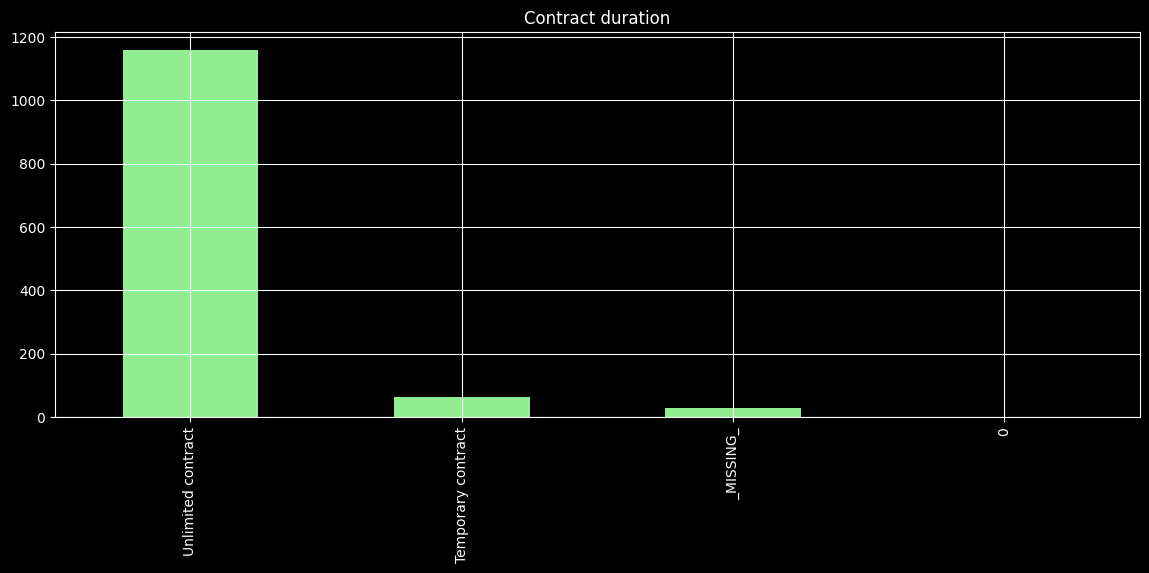

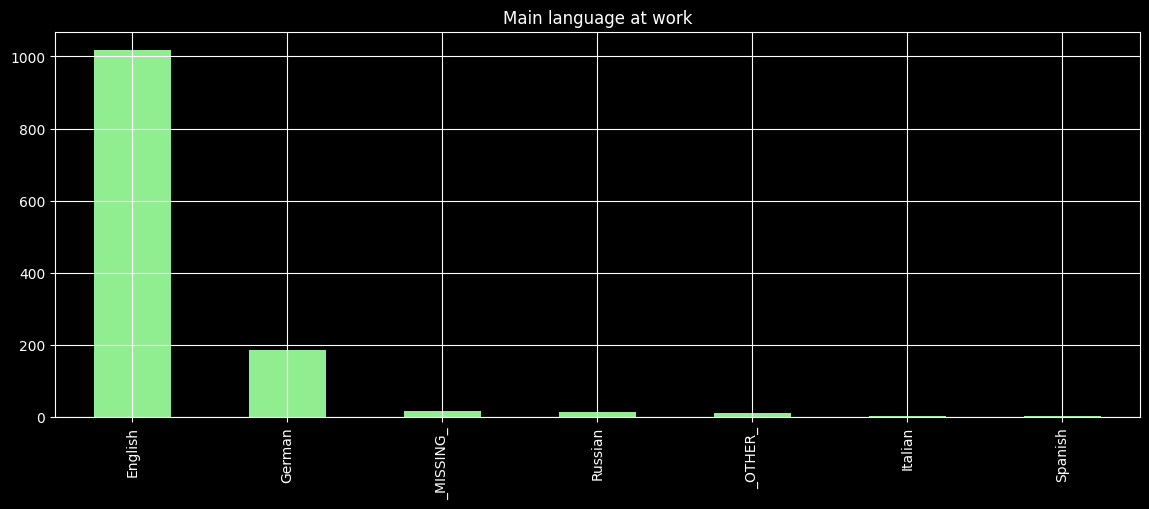

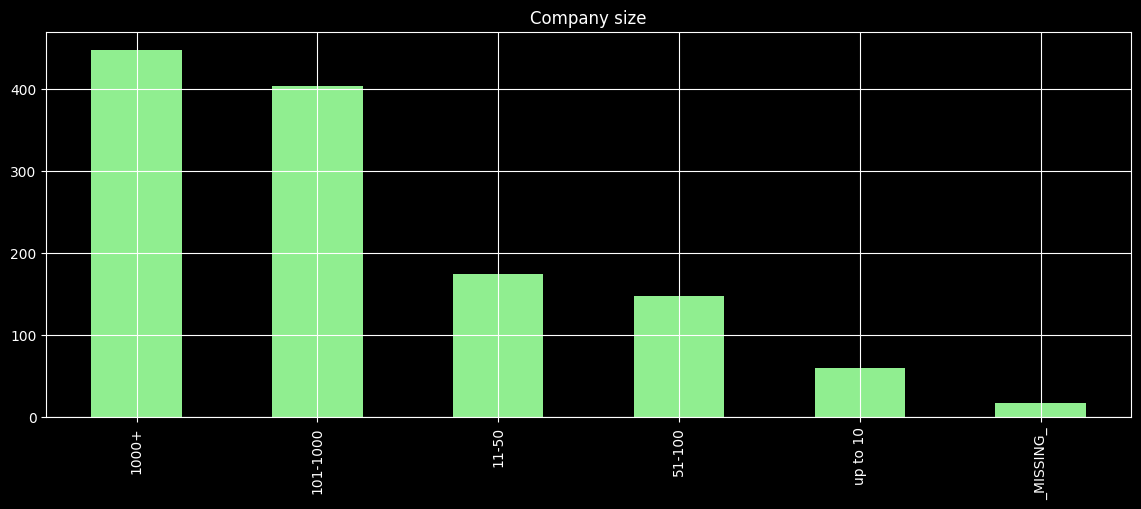

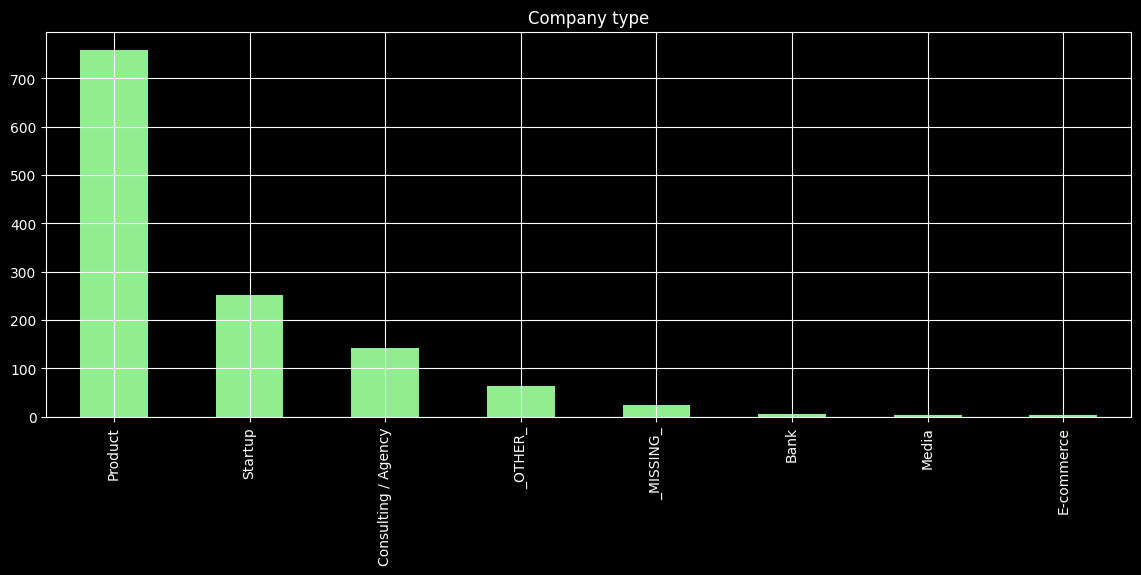

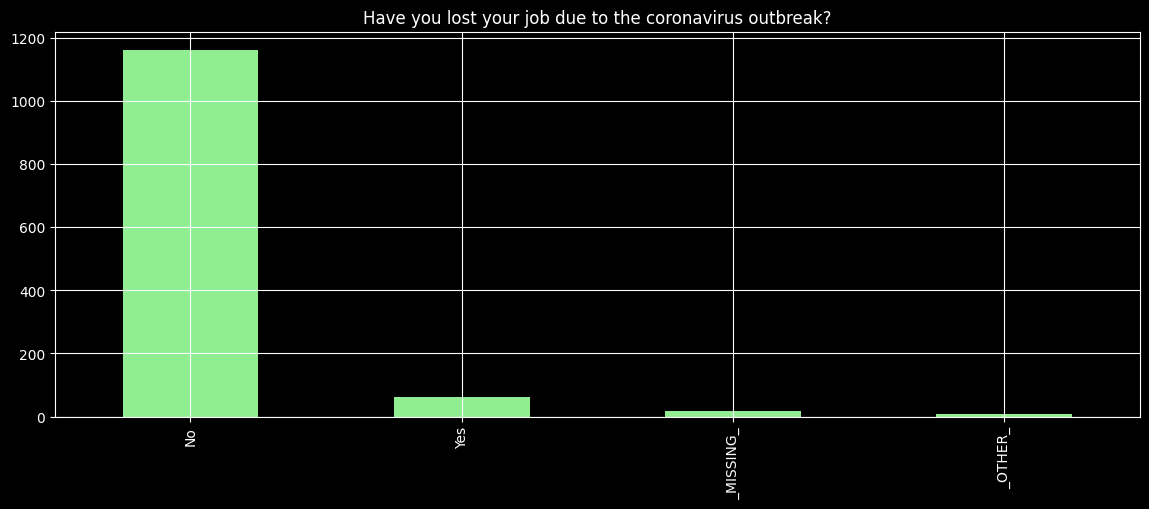

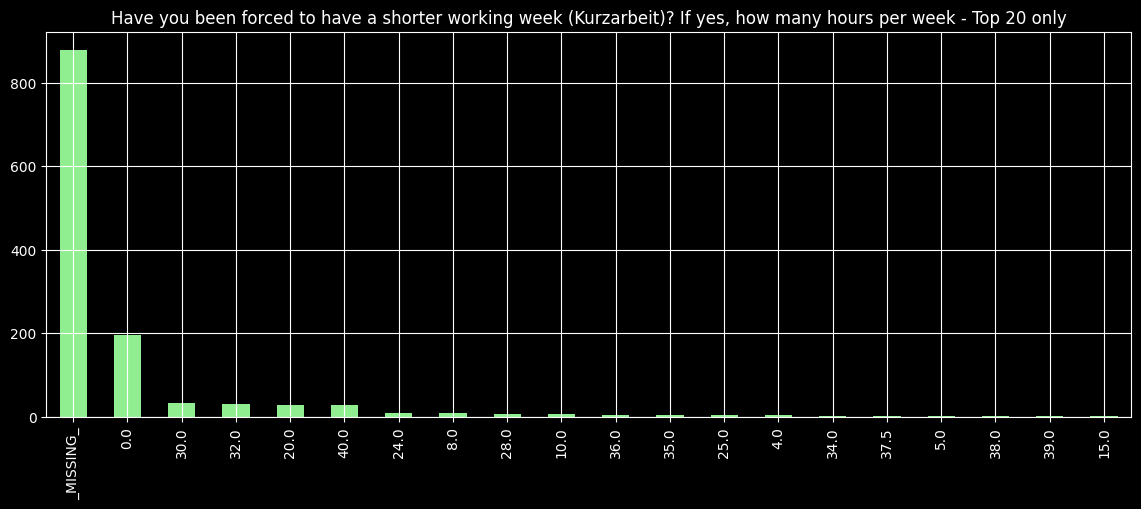

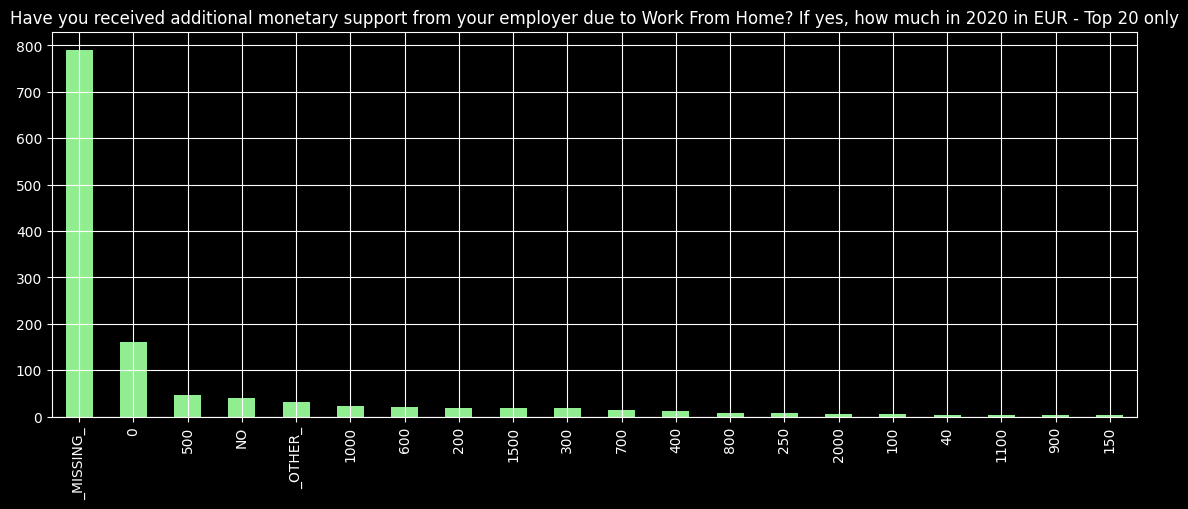

In [36]:
# توزیع نمودار ویژگی های طبقه بندی شده
for f in features_cat:
    plt.figure(figsize=(14,5))
    val_c = df_2020[f].value_counts()
    if len(val_c) <= 20:
        val_c.plot(kind='bar', color='lightgreen')
        plt.title(f)
    else: # اگر بیش از 20 سطح فقط 20 مرتبه را نشان دهند
        val_c[0:20].plot(kind='bar', color='lightgreen')
        plt.title(f + ' - Top 20 only')
        
    plt.grid()
    plt.show()

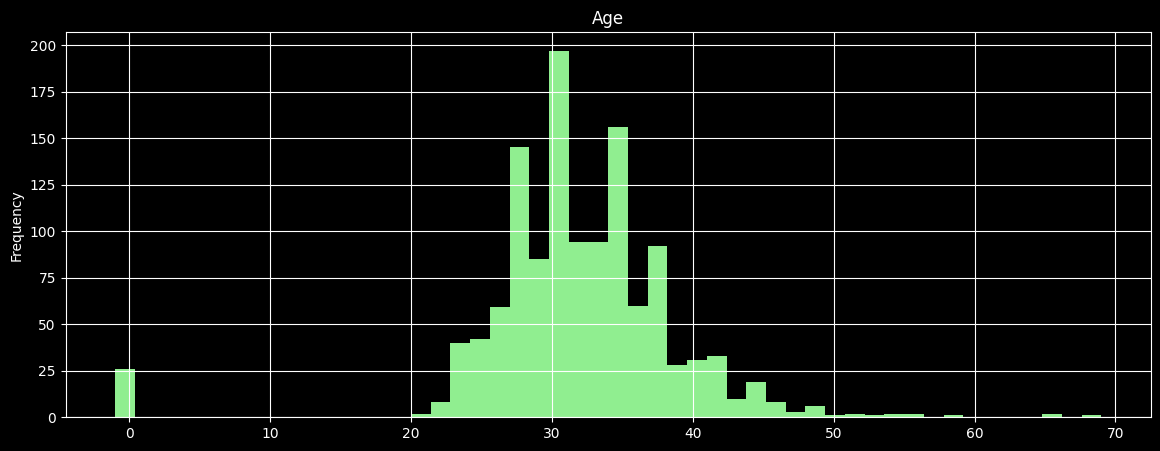

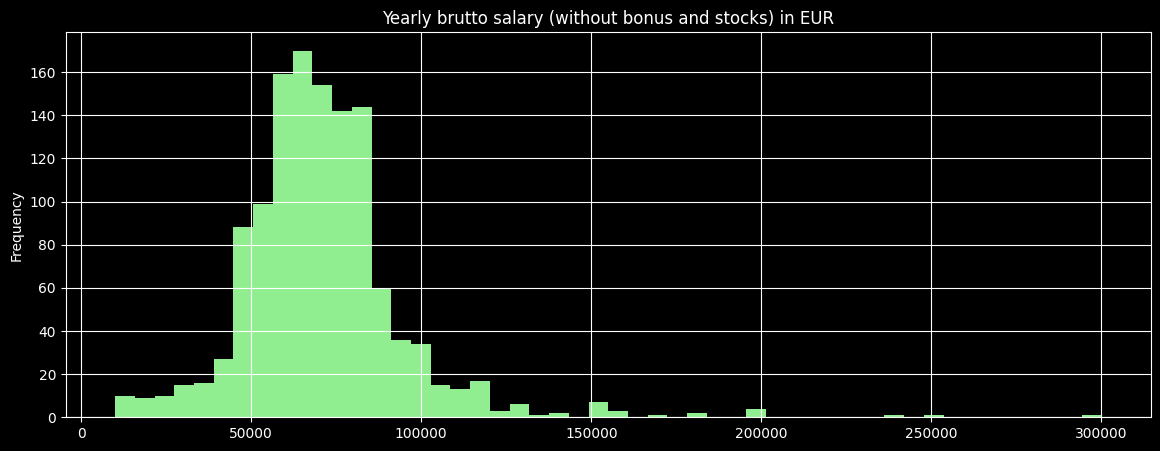

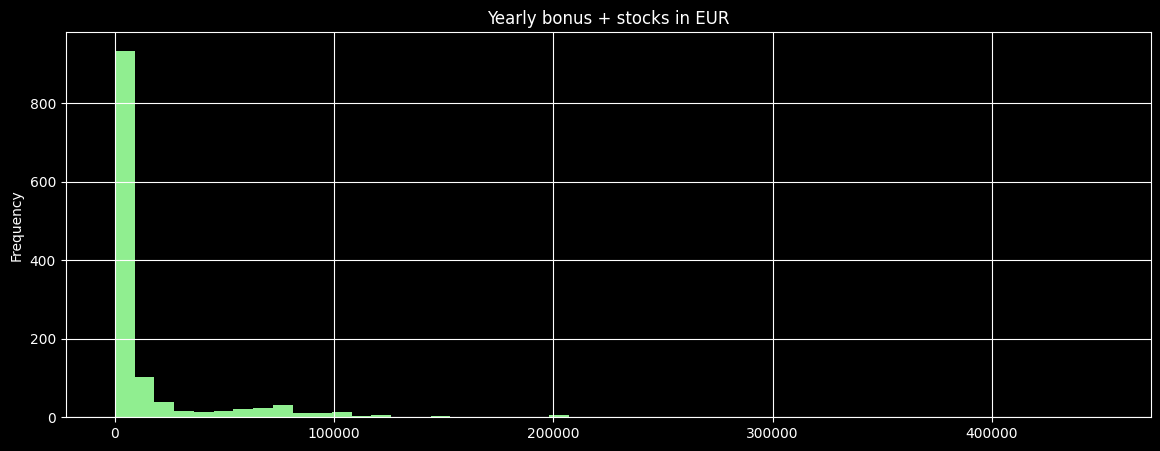

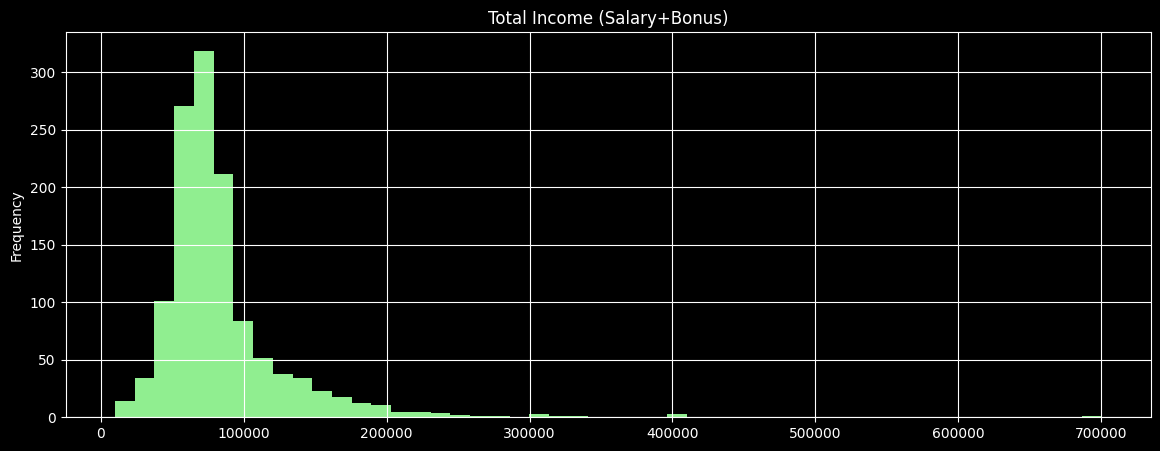

In [37]:
# توزیع نمودار ویژگی های عددی
for f in features_num:
    plt.figure(figsize=(14,5))
    df_2020[f].plot(kind='hist', bins = 50, color='lightgreen')
    plt.title(f)
    plt.grid()
    plt.show()

In [38]:
# آمار حقوق و دستمزد
df_2020['Yearly brutto salary (without bonus and stocks) in EUR'].describe()

count      1250.000000
mean      71032.281704
std       24340.674268
min       10001.000000
25%       58200.000000
50%       70000.000000
75%       80000.000000
max      300000.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [39]:
# آمار درآمد کل
df_2020['Total Income (Salary+Bonus)'].describe()

count      1250.000000
mean      84227.804464
std       45789.994371
min       10001.000000
25%       60000.000000
50%       73750.000000
75%       91000.000000
max      700000.000000
Name: Total Income (Salary+Bonus), dtype: float64

In [40]:
plt.style.use('default')

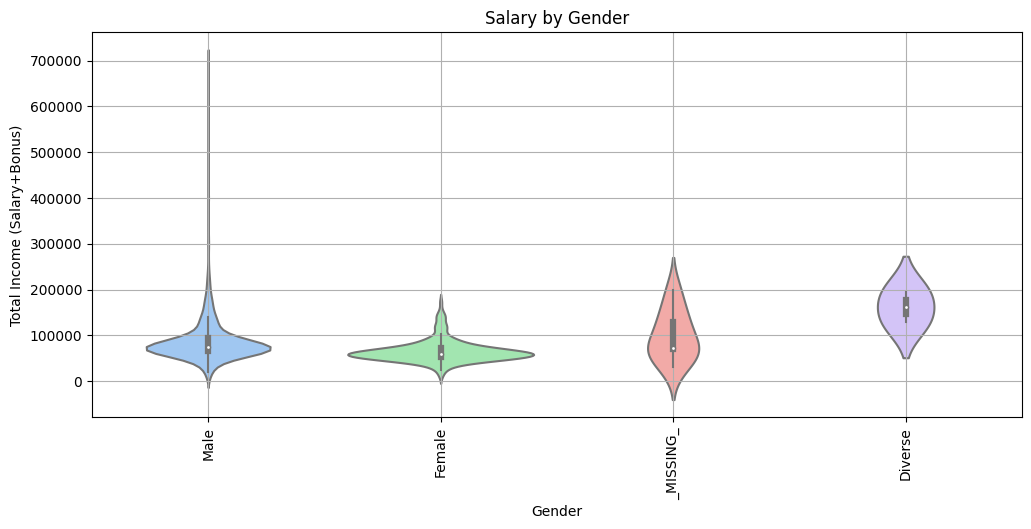

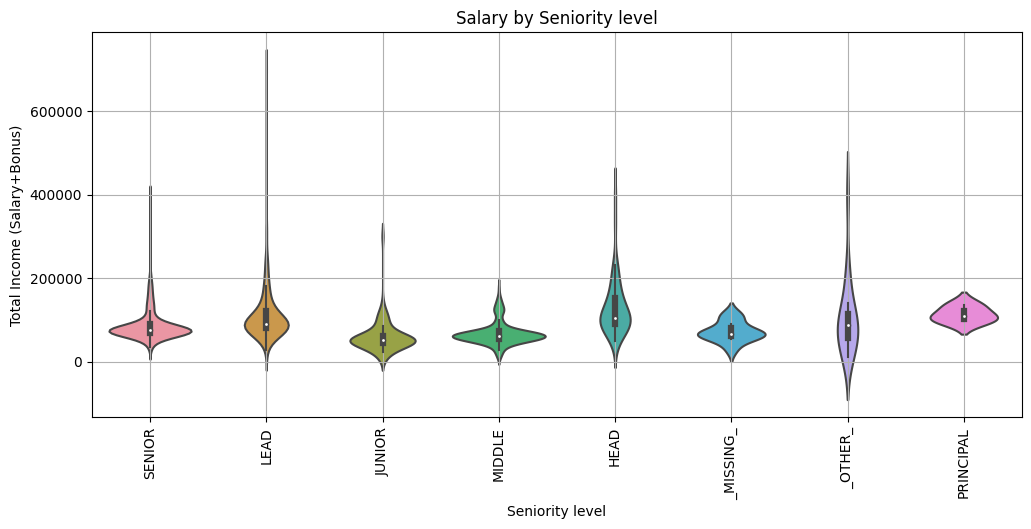

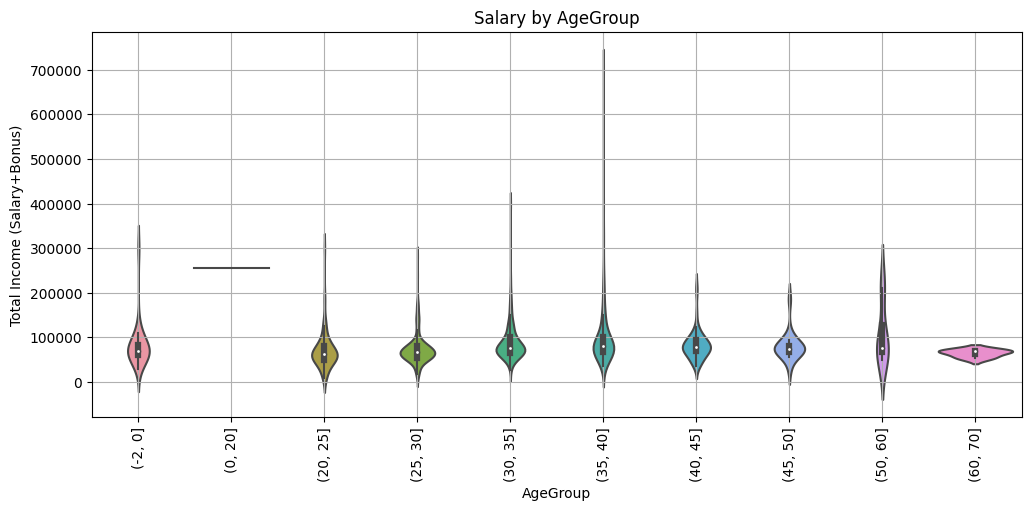

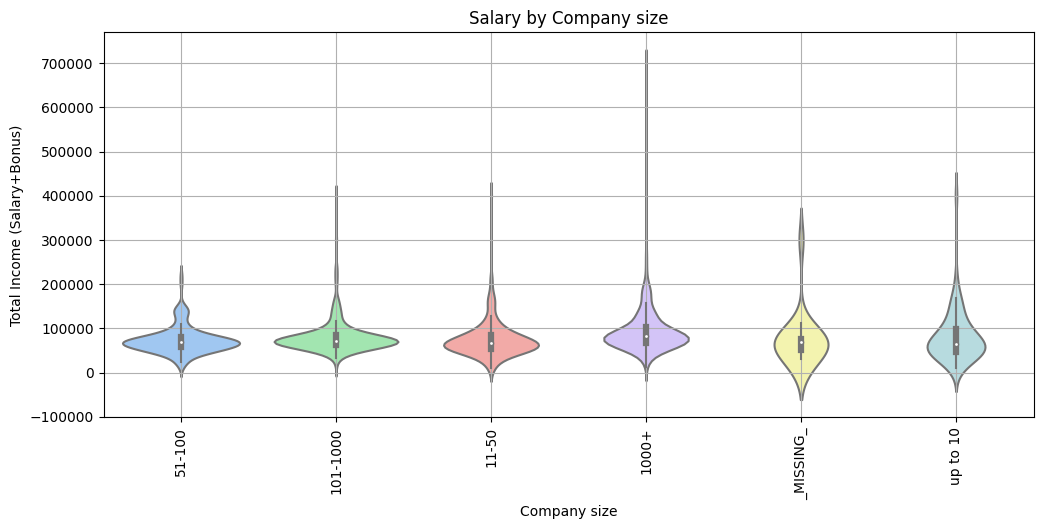

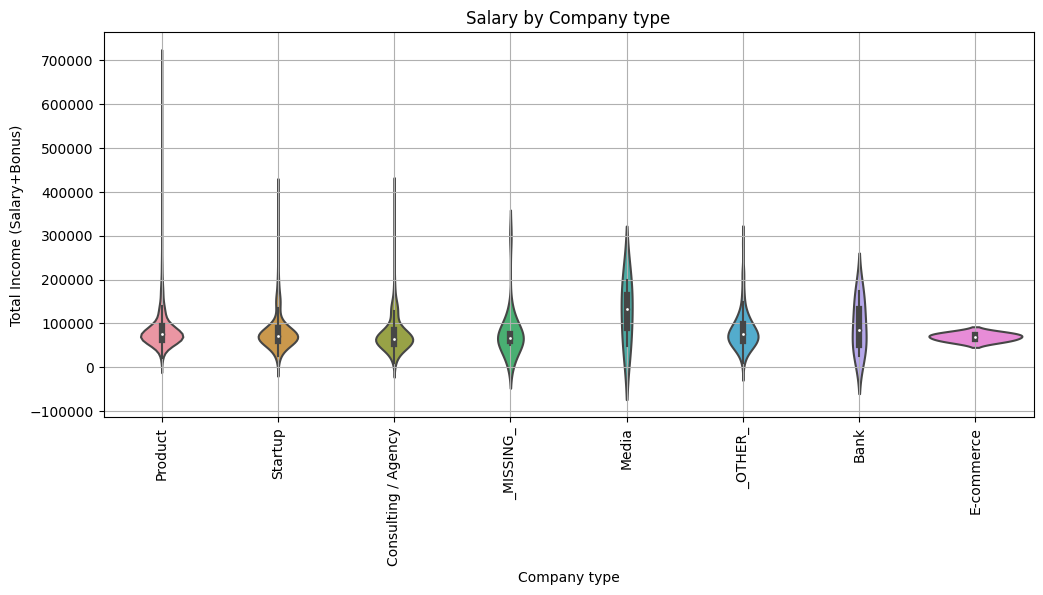

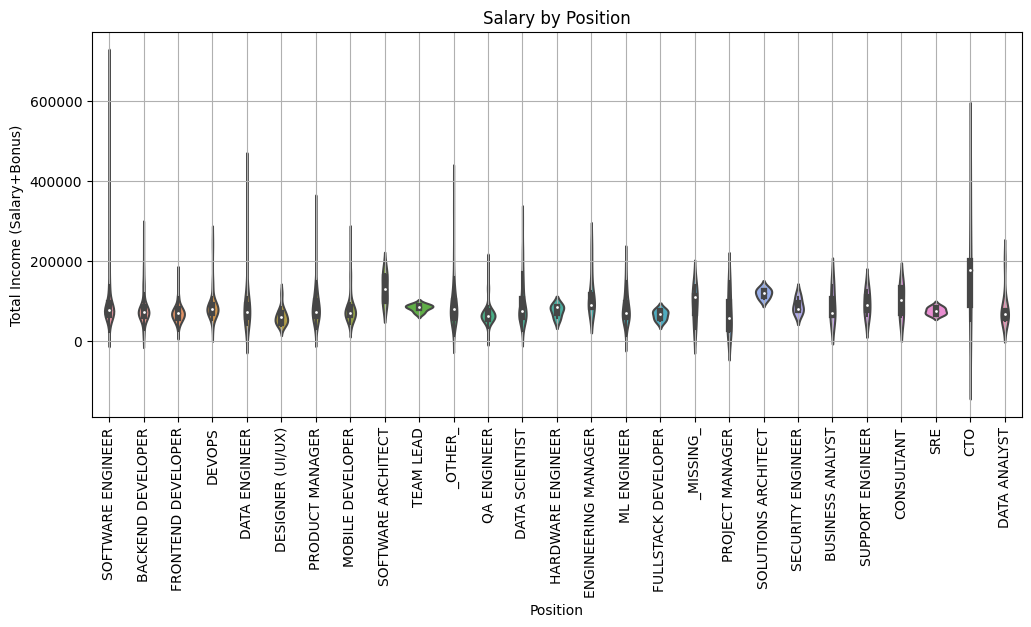

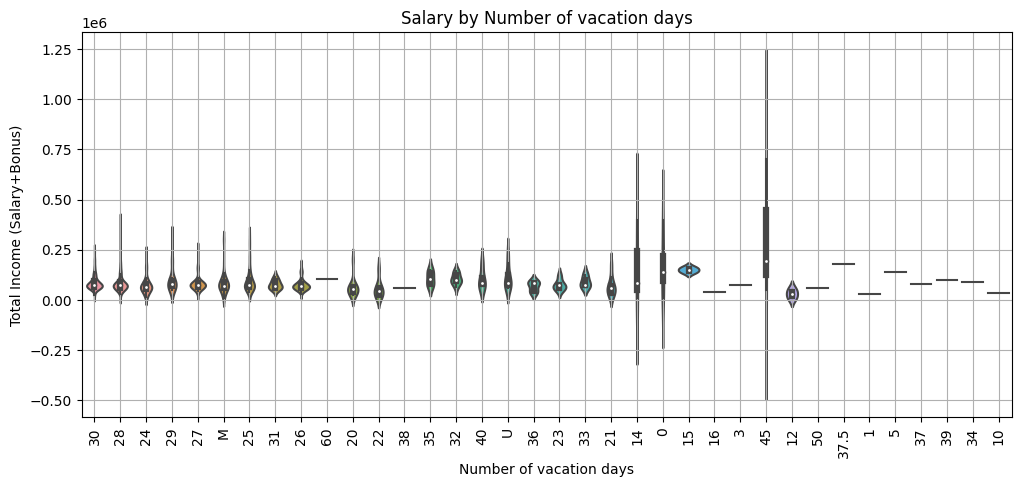

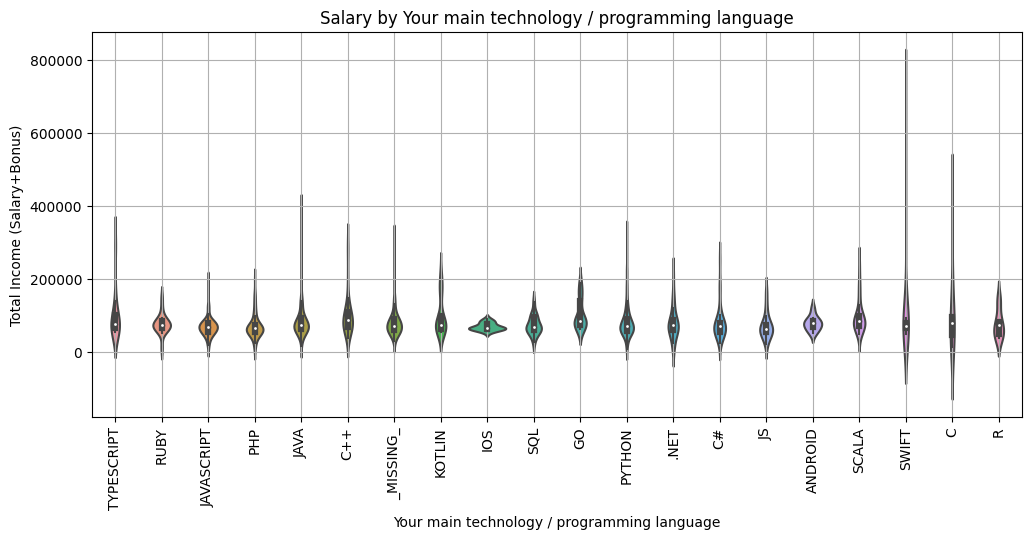

In [41]:
# نمایش وابستگی حقوق به ویژگی های زیر
my_features = ['Gender', 'Seniority level', 'AgeGroup', 'Company size', 'Company type','Position','Number of vacation days']

for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,5))
    sns.violinplot(data=df_2020, x=f,rotation="vertical", y='Total Income (Salary+Bonus)')
    plt.xticks(rotation=90)
    plt.grid()
    plt.title('Salary by ' + f )
    plt.show()
df_top_20 =df_2020.loc[(df_2020["Your main technology / programming language"]     =="PYTHON") | (df_2020["Your main technology / programming language"]     =="JAVA") | (df_2020["Your main technology / programming language"]     =="_MISSING_") | (df_2020["Your main technology / programming language"]     =="JAVASCRIPT") | (df_2020["Your main technology / programming language"]     =="PHP") | (df_2020["Your main technology / programming language"]     =="C++") | (df_2020["Your main technology / programming language"]     =="C#") | (df_2020["Your main technology / programming language"]     =="SWIFT") | (df_2020["Your main technology / programming language"]     =="SCALA")  | (df_2020["Your main technology / programming language"]     =="KOTLIN") | (df_2020["Your main technology / programming language"]     =="GO") | (df_2020["Your main technology / programming language"]     =="TYPESCRIPT") | (df_2020["Your main technology / programming language"]     ==".NET") | (df_2020["Your main technology / programming language"]     =="RUBY") | (df_2020["Your main technology / programming language"]     =="SQL") | (df_2020["Your main technology / programming language"]     =="JS") | (df_2020["Your main technology / programming language"]     =="C") | (df_2020["Your main technology / programming language"]     =="IOS") | (df_2020["Your main technology / programming language"]     =="ANDROID")| (df_2020["Your main technology / programming language"]     =="R")]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(12,5))
sns.violinplot(data=df_top_20, x="Your main technology / programming language", y='Total Income (Salary+Bonus)')
plt.xticks(rotation=90)
plt.grid()
plt.title('Salary by Your main technology / programming language' )
plt.show()